In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [2]:
results_eur_usd = pd.read_csv('../data/results/EUR_USD.csv')
results_aud_usd = pd.read_csv('../data/results/AUD_USD.csv')
results_gbp_usd = pd.read_csv('../data/results/GBP_USD.csv')
results_nzd_usd = pd.read_csv('../data/results/NZD_USD.csv')
results_usd_cad = pd.read_csv('../data/results/USD_CAD.csv')
results_usd_jpy = pd.read_csv('../data/results/USD_JPY.csv')
results_usd_chf = pd.read_csv('../data/results/USD_CHF.csv')
results_df = [results_eur_usd, results_usd_jpy, results_aud_usd, results_gbp_usd, results_nzd_usd, results_usd_cad, results_usd_chf]
titles = ['EUR_USD','USD_JPY','AUD_USD','GBP_USD','NZD_USD','USD_CAD','USD_CHF']

In [4]:
models = ['LSTM','SRNN','CNN','CNN-LSTM','CNN-SRNN']
accuracys = {}
precisions = {}
recalls = {}
f1_scores = {}
        
for model in models:
    accuracy = []
    precision = []
    recall = []
    f1_score = []
    for df in results_df:
        grouped_df = df.groupby('model').last().reset_index()
        acc = grouped_df.loc[grouped_df['model'] == f'{model}', 'accuracy'].values[0]
        f1s = grouped_df.loc[grouped_df['model'] == f'{model}', 'f1_score'].values[0]
        pre = grouped_df.loc[grouped_df['model'] == f'{model}', 'precision'].values[0]
        rec = grouped_df.loc[grouped_df['model'] == f'{model}', 'recall'].values[0]
        accuracy.append(acc)
        precision.append(pre)
        recall.append(rec)
        f1_score.append(f1s)
    accuracys[model] = accuracy
    precisions[model] = precision
    recalls[model] = recall
    f1_scores[model] = f1_score

### Accuracy

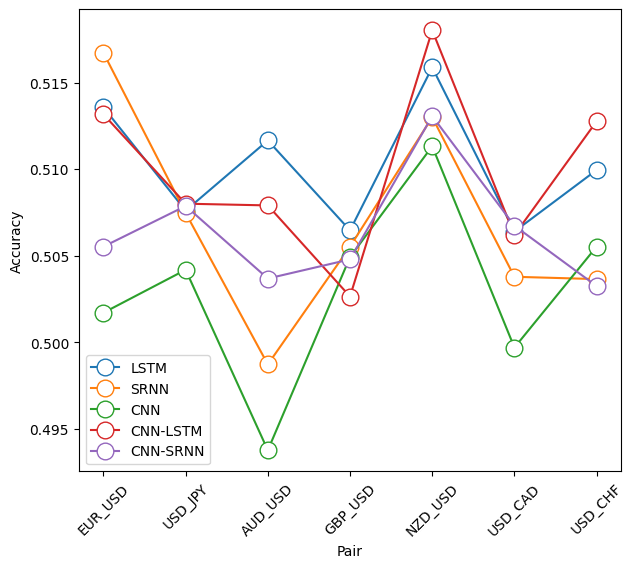

In [10]:
plt.figure(figsize=(7, 6))


for model, accuracy in accuracys.items():
    plt.plot(accuracy, label=f'{model}', marker='.', linestyle='solid', markersize=24, markerfacecolor='white')

plt.xticks(ticks=range(len(titles)), labels=titles, rotation=45)
plt.xlabel('Pair')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

### Precision

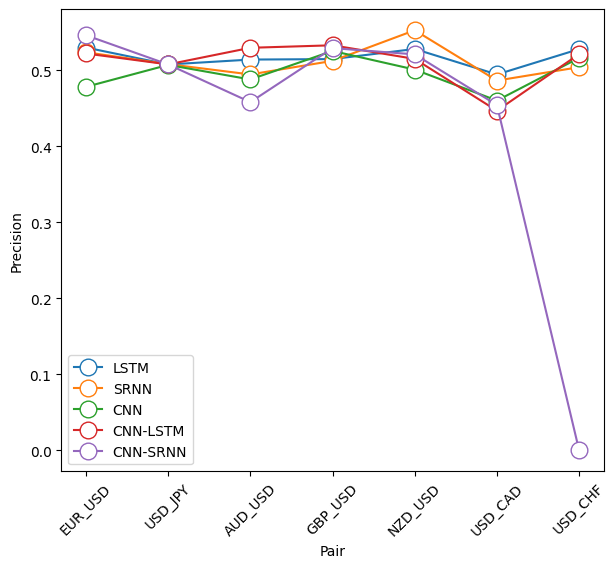

In [12]:
plt.figure(figsize=(7, 6))


for model, precision in precisions.items():
    plt.plot(precision, label=f'{model}', marker='.', linestyle='solid', markersize=24, markerfacecolor='white')

plt.xticks(ticks=range(len(titles)), labels=titles, rotation=45)
plt.xlabel('Pair')
plt.ylabel('Precision')
plt.legend()
plt.show()

### Recall

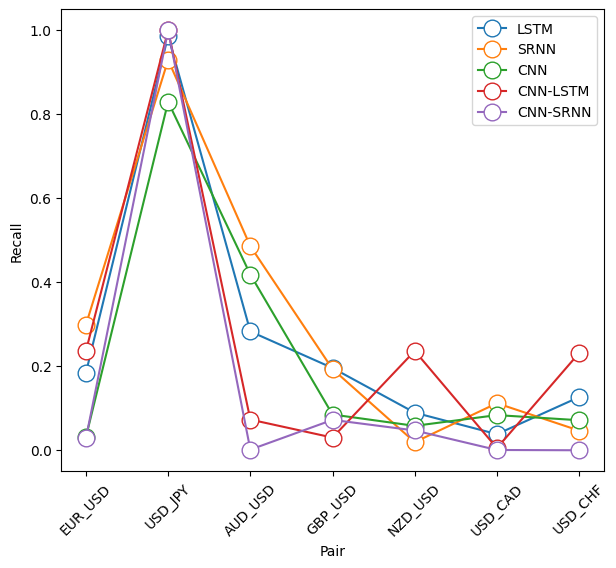

In [13]:
plt.figure(figsize=(7, 6))


for model, recall in recalls.items():
    plt.plot(recall, label=f'{model}', marker='.', linestyle='solid', markersize=24, markerfacecolor='white')

plt.xticks(ticks=range(len(titles)), labels=titles, rotation=45)
plt.xlabel('Pair')
plt.ylabel('Recall')
plt.legend()
plt.show()

### f1 Score

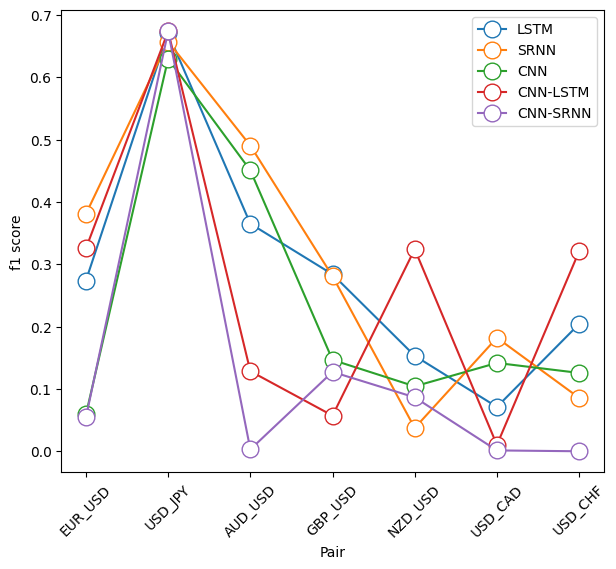

In [14]:
plt.figure(figsize=(7, 6))


for model, f1_score in f1_scores.items():
    plt.plot(f1_score, label=f'{model}', marker='.', linestyle='solid', markersize=24, markerfacecolor='white')

plt.xticks(ticks=range(len(titles)), labels=titles, rotation=45)
plt.xlabel('Pair')
plt.ylabel('f1 score')
plt.legend()
plt.show()

### Average Scores

In [16]:
for (model, accuracy), precision, recall, f1_score in zip(accuracys.items(), precisions.values(), recalls.values(), f1_scores.values()):
    print(f'Average scores for {model}')
    print(f'Mean Accuracy : {np.mean(np.array(accuracy))}')
    print(f'Mean Precision : {np.mean(np.array(precision))}')
    print(f'Mean Recall : {np.mean(np.array(recall))}')
    print(f'Mean F1_score : {np.mean(np.array(f1_score))}')
    print('\n')
    

Average scores for LSTM
Mean Accuracy : 0.5102218334276164
Mean Precision : 0.5169571001321309
Mean Recall : 0.2721016314251967
Mean F1_score : 0.2888448880892879


Average scores for SRNN
Mean Accuracy : 0.5069850967213926
Mean Precision : 0.5119655280758187
Mean Recall : 0.2979709280244333
Mean F1_score : 0.30202341244947356


Average scores for CNN
Mean Accuracy : 0.5030207908142875
Mean Precision : 0.4968291680230723
Mean Recall : 0.22542869245629735
Mean F1_score : 0.2367546456671791


Average scores for CNN-LSTM
Mean Accuracy : 0.5098196142212837
Mean Precision : 0.5110416649511822
Mean Recall : 0.25898274499414703
Mean F1_score : 0.2628531041443246


Average scores for CNN-SRNN
Mean Accuracy : 0.5064202355593388
Mean Precision : 0.431128023765922
Mean Recall : 0.16429010041256298
Mean F1_score : 0.13516183984486585


